In [1]:
import pandas as pd
ageinc_df = pd.read_csv('ageinc.csv')

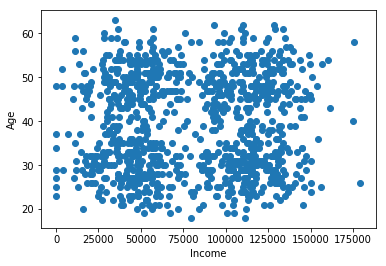

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(ageinc_df['income'], ageinc_df['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [3]:
ageinc_df['z_income'] = (ageinc_df['income'] - ageinc_df['income'].mean())/ageinc_df['income'].std()
ageinc_df['z_age'] = (ageinc_df['age'] - ageinc_df['age'].mean())/ageinc_df['age'].std()

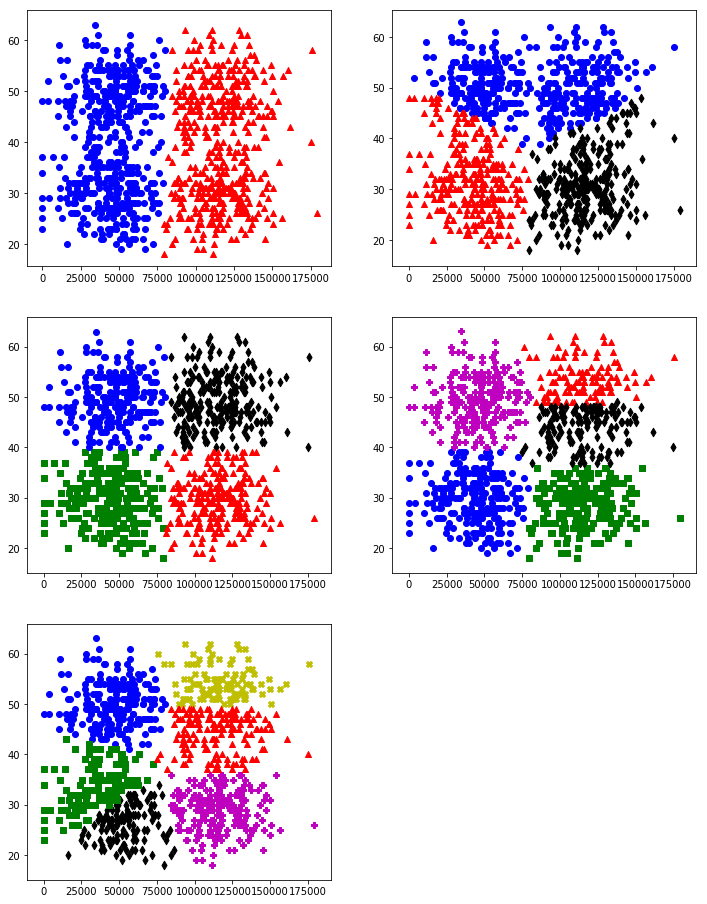

In [4]:
from sklearn import cluster

colors = ['r', 'b', 'k', 'g', 'm', 'y']
markers = ['^', 'o', 'd', 's', 'P', 'X']

plt.figure(figsize=(12,16))

for n in range(2,7):
    model = cluster.KMeans(n_clusters=n, random_state=10)
    ageinc_df['cluster'] = model.fit_predict(ageinc_df[['z_income','z_age']])
 
    plt.subplot(3, 2, n-1)
    for c in ageinc_df['cluster'].unique():
        d = ageinc_df[ageinc_df['cluster'] == c]
        plt.scatter(d['income'], d['age'], marker=markers[c], color=colors[c])    

plt.show()
